In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 5us/step


In [8]:
# feature-wise normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [10]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) # typical for scalar regression
    
    # mse = Mean Squared Error; widely used for regression problems
    # mae = Mean Absolute Error
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

K-fold cross validation

In [14]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k 
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print("Processing fold #%d" % i)
    a = i * num_val_samples
    b = a + num_val_samples
    val_data = train_data[a:b]
    val_targets = train_targets[a:b]
    
    partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:a], train_targets[b:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, 
              validation_data=(val_data, val_targets), 
              epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [16]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [15]:
np.mean(range(100))

49.5

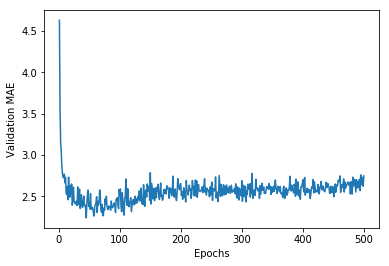

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


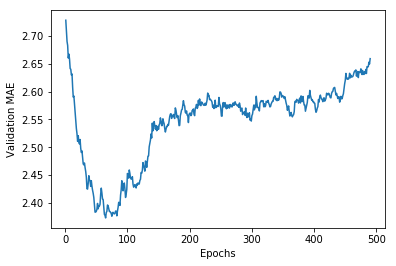

In [28]:
def smooth_curve(points, factor):
    sps = []
    for p in points:
        if sps:
            sps.append(sps[-1]*factor + (1-factor)*p)
        else:
            sps.append(p)
    return sps

smooth_mae_history = smooth_curve(average_mae_history[10:], 0.9)

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [20]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

102/102 [==============================] - 0s 898us/step
2.5601680232029334


In [26]:
print(np.array(range(5)) + 1)

[1 2 3 4 5]
